# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Tai Le
- GitHub Username: tnl001

# Research Question

What is the relationship between the amount of violent and violent related crimes and the parks' hour of operation in San Diego?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Violent and violent related crimes tend to fall within the operating hour of San Diego parks.

# Dataset(s)

Dataset Name: San Diego Crime Data 2018
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2018_datasd.csv
- Number of observations: 570459
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2018

Dataset Name: San Diego Crime Data 2019
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2019_datasd.csv
- Number of observations: 590967
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2019

Dataset Name: San Diego Crime Data 2020
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2020_datasd.csv
- Number of observations: 522569
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2020

Dataset Name: San Diego Crime Crime Call Types
- Link to the dataset: http://seshat.datasd.org/pd/pd_cfs_calltypes_datasd.csv
- Number of observations: 289
- Description: This dataset contains codes of call type and their associated description

Dataset Name: San Diego Police Department Beat Codes
- Link to the dataset: http://seshat.datasd.org/pd/pd_beat_neighborhoods_datasd.csv
- Number of observations: 125
- Description: This dataset contains beat codes that are associated with San Diego neighborhoods

Dataset Name: San Diego Parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833
- Description: This dataset includes San Diego parks' names and zipcodes

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Data Cleaning

Load in the datasets

In [2]:
crime_2020 = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
crime_2019 = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
crime_2018 = pd.read_csv('pd_calls_for_service_2018_datasd.csv')
call_types = pd.read_csv('pd_cfs_calltypes_datasd.csv')
pd_beat_codes = pd.read_csv('pd_beat_neighborhoods_datasd.csv')
parks_info = pd.read_csv('yelp_SD_parks.csv')

In [3]:
parks_info.shape

(833, 10)

Here, I'm taking a quick look at what the data looks like

In [4]:
crime_2020.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1


In [5]:
crime_2019.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


Taking a look at the call_types dataset

In [6]:
call_types

,call_type,description,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1016,PRISONER IN CUSTODY,NaN,NaN,NaN
1,1016PT,PTU (PRISONER TRANSPORT),NaN,NaN,NaN
2,1016QC,SHOPLIFTER/QUICK CITE,NaN,NaN,NaN
3,1021,PHONE YOUR STATION,NaN,NaN,NaN
4,1021H,PHONE YOUR HOME,NaN,NaN,NaN
...,...,...,...,...,...
284,TLO,TERRORISM LIAISON OFFICER,NaN,NaN,NaN
285,TP,TRAFFIC PURSUIT,NaN,NaN,NaN
286,TRO,"TRO VIOLATION, REPORT",NaN,NaN,NaN
287,VARDA,VARDA ALARM,NaN,NaN,NaN


Dropping the 3 Unnamed columns

In [7]:
call_types = call_types.dropna(axis=1)

In [8]:
call_types = call_types.drop_duplicates('call_type')

I noticed that there are some inconsistency with the 11-6, 11-7, and 11-8 call type codes when opening them in Excel and reading them as csv using pandas. I replace the inconsistent values with the correct values.

In [9]:
for n in call_types['call_type'].values: 
    call_types['call_type'].replace(to_replace='6-Nov', value='11-6', inplace=True)
    call_types['call_type'].replace(to_replace='7-Nov', value='11-7', inplace=True)
    call_types['call_type'].replace(to_replace='8-Nov', value='11-8', inplace=True)

Merging the crime_2020 with call_types using the left outer joint method. This way, I will have the description from call_types for each call type in crime_2020.

In [10]:
cl_crimes = pd.concat([crime_2018, crime_2019, crime_2020]).reset_index(drop=True)
#cl_crime_2020 = crime_2020.merge(call_types, how='left')
cl_crimes = cl_crimes.merge(call_types, how='left')
cl_crimes

#call_types

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,0,NaN,MONROE,AVE,NaN,PARK,NaN,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,0,NaN,MAIN,ST,NaN,THOR,NaN,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,4300,NaN,OCEAN,BLV,NaN,NaN,NaN,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,4500,NaN,BOYLSTON,ST,NaN,NaN,NaN,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,0,NaN,04TH,AVE,NaN,ISLAND,NaN,1151,O,523,3,PED STOP/FIELD INTERVIEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683990,E20120001602,2020-12-01 23:23:01,3,1200,NaN,K,ST,NaN,NaN,NaN,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER
1683991,E20120001605,2020-12-01 23:28:18,3,5800,NaN,STREAMVIEW,DR,NaN,NaN,NaN,417,K,823,0,THREATENING W/WEAPON
1683992,E20120001608,2020-12-01 23:33:18,3,100,E,CALLE PRIMERA,NaN,NaN,NaN,NaN,T,K,712,2,TRAFFIC STOP WITH PLATE
1683993,E20120001616,2020-12-01 23:48:27,3,100,NaN,06TH,AVE,NaN,NaN,NaN,SELENF,K,521,3,SELECTIVE ENFORCEMENT


Dropping the unnecessary columns

In [11]:
cl_crimes = cl_crimes.drop(labels=['address_dir_intersecting', 'address_road_intersecting', 
                                           'address_sfx_intersecting', 'address_dir_primary', 
                                           'address_number_primary', 'address_road_primary',
                                           'address_sfx_primary'], axis=1)

In [12]:
cl_crimes.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW


The beat code will determine which neighborhood it is that the crime occured. Here, I'm taking a quick look at the beat code dataset

In [13]:
pd_beat_codes.head()

,Beat,Neighborhood
0,111,Clairemont Mesa East
1,112,Clairemont Mesa West
2,113,Bay Ho
3,114,North Clairemont
4,115,University City


Renaming the columns so that they are all in lowercase.

In [14]:
pd_beat_codes.columns = ['beat', 'neighborhood']

Merging the crime_2020 with pd_beat_codes using the left outer joint method. This way, I will have the neighborhood's name from pd_beat_codes for each beat code in crime_2020.

In [15]:
cl_crimes = cl_crimes.merge(pd_beat_codes, how='left')

In [16]:
cl_crimes

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED,University Heights
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1,Barrio Logan
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY,Pacific Beach
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1,Chollas View
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW,Gaslamp
...,...,...,...,...,...,...,...,...,...
1683990,E20120001602,2020-12-01 23:23:01,3,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER,East Village
1683991,E20120001605,2020-12-01 23:28:18,3,417,K,823,0,THREATENING W/WEAPON,Redwood Village
1683992,E20120001608,2020-12-01 23:33:18,3,T,K,712,2,TRAFFIC STOP WITH PLATE,San Ysidro
1683993,E20120001616,2020-12-01 23:48:27,3,SELENF,K,521,3,SELECTIVE ENFORCEMENT,East Village


Here, I'm just exploring the rows where neighborhood is NaN

In [17]:
cl_crimes.isna().sum()

incident_num        0
date_time           0
day_of_week         0
call_type        5242
disposition      3185
beat                0
priority            0
description      5334
neighborhood    31639
dtype: int64

Dropping all rows that contain NaN

In [18]:
cl_crimes = cl_crimes.dropna()
cl_crimes.shape

(1643908, 9)

Here, I'm focusing on a certain type of crime. Below are the call type codes that I used to extract the data:
1. 11-6: Discharging firearms
2. 207: Kidnapping in progress
3. 207R: Kidnapping report
4. 211: Robbery
5. 278: Child stealing
6. 415V: Disturbing peace with violence
7. 415W: Disturbing peace with[?] weapon
8. 417: Threatening with weapon

In [19]:
filtered_crimes = cl_crimes[(cl_crimes['call_type'] == '11-6') | (cl_crimes['call_type'] == '207') | 
                            (cl_crimes['call_type'] == '207R') | (cl_crimes['call_type'] == '211') |
                            (cl_crimes['call_type'] == '278') | (cl_crimes['call_type'] == '415V') |
                            (cl_crimes['call_type'] == '415W') | (cl_crimes['call_type'] == '418')]

In [20]:
filtered_crimes['num_time'] = 1

<ipython-input-20-704cf57d1ed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crimes['num_time'] = 1


In [21]:
filtered_crimes.isna().any()

incident_num    False
date_time       False
day_of_week     False
call_type       False
disposition     False
beat            False
priority        False
description     False
neighborhood    False
num_time        False
dtype: bool

In [22]:
filtered_crimes.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood,num_time
21,E18010000022,2018-01-01 00:03:51,0,415V,K,322,1,DISTURBING PEACE W/VIOLENCE,Allied Gardens,1
24,E18010000025,2018-01-01 00:04:19,0,11-6,DUP,512,1,DISCHARGING FIREARMS,Logan Heights,1
36,E18010000037,2018-01-01 00:08:30,0,415V,A,518,1,DISTURBING PEACE W/VIOLENCE,South Park,1
40,E18010000041,2018-01-01 00:10:02,0,11-6,U,441,0,DISCHARGING FIREARMS,Mountain View,1
47,E18010000048,2018-01-01 00:11:24,0,11-6,K,512,0,DISCHARGING FIREARMS,Logan Heights,1


In [23]:
filtered_crimes.groupby('neighborhood').sum()

,day_of_week,beat,priority,num_time
neighborhood,,,,
Adams North,455,106634,119,131
Allied Gardens,789,62790,184,195
Alta Vista,198,23706,53,54
Azalea/Hollywood Park,768,185370,212,222
Balboa Park,899,141777,243,267
...,...,...,...,...
Torrey Preserve,16,2796,3,3
University City,2244,71760,590,624
University Heights,1845,323856,487,519


In [24]:
type_time_called = filtered_crimes.groupby('description').sum()
type_time_called = type_time_called.drop(labels=['day_of_week', 'beat', 'priority'], axis=1)

<AxesSubplot:ylabel='description'>

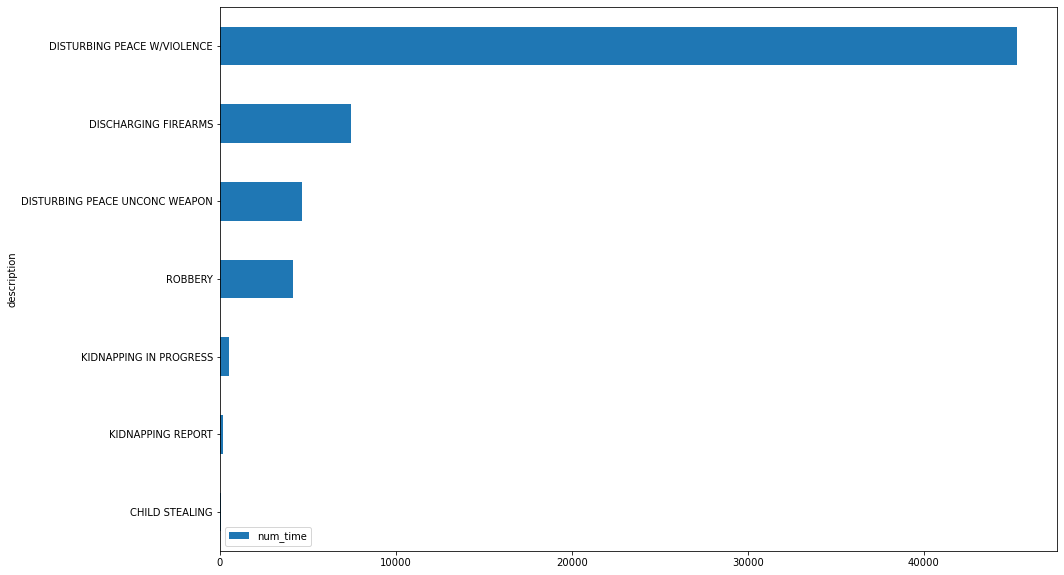

In [25]:
type_time_called.sort_values(by='num_time', ascending=True).plot(kind='barh', figsize=(15,10))

In [26]:
neighbor_time_called = filtered_crimes.groupby('neighborhood').sum()
neighbor_time_called = neighbor_time_called.drop(labels=['day_of_week', 'beat', 'priority'], axis=1)

In [27]:
neighbor_time_called

,num_time
neighborhood,
Adams North,131
Allied Gardens,195
Alta Vista,54
Azalea/Hollywood Park,222
Balboa Park,267
...,...
Torrey Preserve,3
University City,624
University Heights,519


In [28]:
filtered_crimes['name'] = filtered_crimes['neighborhood']

<ipython-input-28-f3b457fce026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crimes['name'] = filtered_crimes['neighborhood']


In [29]:
parks_info.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [30]:
parks_info = parks_info.drop(labels=['phone', 'rating', 'review_count', 'id'], axis=1)

In [31]:
parks_info.head()

,name,address,url,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",https://www.yelp.com/biz/balboa-park-san-diego...,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",https://www.yelp.com/biz/civita-park-san-diego...,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",https://www.yelp.com/biz/waterfront-park-san-d...,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",https://www.yelp.com/biz/trolley-barn-park-san...,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",https://www.yelp.com/biz/bay-view-park-coronad...,-117.178967,32.701785,False


In [32]:
parks_info = parks_info.drop_duplicates('name')
parks_crime_merge = parks_info.merge(filtered_crimes, how='left').dropna().groupby('name').sum()
parks_crime_merge = parks_crime_merge.drop(labels=['longitude', 'latitude', 'is_closed', 'day_of_week', 'beat', 'priority'], axis=1)
parks_crime_merge

,num_time
name,
Balboa Park,267.0
Bay Park,417.0
Grantville,609.0
Kensington,161.0
La Jolla,732.0
Lake Murray,366.0
Little Italy,585.0
Mission Bay Park,326.0
Mission Beach,660.0


<AxesSubplot:ylabel='name'>

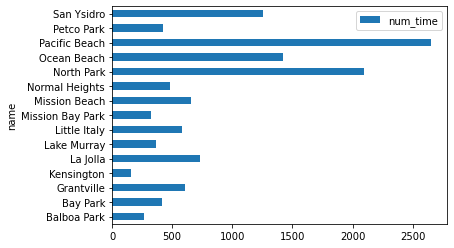

In [33]:
parks_crime_merge.plot(kind='barh')

In [34]:
recs = gpd.read_file('rec_centers_datasd.geojson')

In [35]:
recs.head()

,objectid,rec_bldg,park_name,address,zip,sq_ft,year_built,serv_dist,adult_ctr,comfort_st,...,stage,teen_ctr,tinytot_rm,weight_rm,current_cd,fy13_cd,facility_n,thomas_bro,community,geometry
0,2935,Scripps Ranch Rec Center,Scripps Ranch Community Park,11454 Blue Cypress Dr,92131,12080,2000,40,0,0,...,0,0,0,0,5,5,10279,1210-A2,MIRAMAR RANCH NORTH,POINT (-117.07986 32.92867)
1,2936,North Park Rec Center,North Park Community Park,4044 Idaho St,92104,11230,1947,41,1,0,...,0,1,1,0,3,3,488,1269-D5,NORTH PARK,POINT (-117.13418 32.75090)
2,2937,Southcrest Rec Center,Southcrest Community Park,4149 Newton Av,92113,10620,1964,43,0,0,...,0,1,0,1,8,9,299,1289-H6,SOUTHCREST,POINT (-117.10459 32.69427)
3,2938,Azalea Rec Center,Azalea Neighborhood Park,2596 Violet St,92105,1790,1973,41,0,0,...,0,0,0,0,3,9,1072,1269-H7,AZALEA/HOLLYWOOD PARK,POINT (-117.10817 32.73236)
4,2939,Colina Del Sol Rec Center,Colina Del Sol Community Park,5319 Orange Av,92115,6560,1962,41,0,0,...,0,0,0,0,7,9,491,1269-H4,COLINA DEL SOL,POINT (-117.08012 32.75282)


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [36]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*